In [3]:
import numpy as np
import scipy
from numpy import mean, absolute
import pandas as pd
from sklearn import *

from scipy import spatial
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
import math
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
from os import listdir
from pathlib import Path
from os.path import isfile, join
from natsort import natsorted ## !pip install natsort

In [6]:
rootpath="AWID3_Dataset_CSV/CSV/10.SQL_Injection/"
listfiles_SQL_inject = [f for f in listdir(rootpath) if isfile(join(rootpath, f))]
listfiles_SQL_inject=natsorted(listfiles_SQL_inject)

In [7]:
listfiles_SQL_inject

['SQL_Injection_0.csv',
 'SQL_Injection_1.csv',
 'SQL_Injection_2.csv',
 'SQL_Injection_3.csv',
 'SQL_Injection_4.csv',
 'SQL_Injection_5.csv',
 'SQL_Injection_6.csv',
 'SQL_Injection_7.csv',
 'SQL_Injection_8.csv',
 'SQL_Injection_9.csv',
 'SQL_Injection_10.csv',
 'SQL_Injection_11.csv',
 'SQL_Injection_12.csv',
 'SQL_Injection_13.csv',
 'SQL_Injection_14.csv',
 'SQL_Injection_15.csv',
 'SQL_Injection_16.csv',
 'SQL_Injection_17.csv',
 'SQL_Injection_18.csv',
 'SQL_Injection_19.csv',
 'SQL_Injection_20.csv',
 'SQL_Injection_21.csv',
 'SQL_Injection_22.csv',
 'SQL_Injection_23.csv',
 'SQL_Injection_24.csv',
 'SQL_Injection_25.csv',
 'SQL_Injection_26.csv',
 'SQL_Injection_27.csv',
 'SQL_Injection_28.csv',
 'SQL_Injection_29.csv',
 'SQL_Injection_30.csv',
 'SQL_Injection_31.csv',
 'SQL_Injection_32.csv',
 'SQL_Injection_33.csv',
 'SQL_Injection_34.csv',
 'SQL_Injection_35.csv',
 'SQL_Injection_36.csv',
 'SQL_Injection_37.csv',
 'SQL_Injection_38.csv',
 'SQL_Injection_39.csv',
 'SQL_Inje

In [12]:
df = pd.DataFrame()
for file in listfiles_SQL_inject:
    df_temp = pd.read_csv (rootpath+file, low_memory=False)
    df=pd.concat([df,df_temp])
    print(df.shape)


(50000, 254)
(100000, 254)
(150000, 254)
(200000, 254)
(250000, 254)
(300000, 254)
(350000, 254)
(400000, 254)
(450000, 254)
(500000, 254)
(550000, 254)
(600000, 254)
(650000, 254)
(700000, 254)
(750000, 254)
(800000, 254)
(850000, 254)
(899999, 254)
(949997, 254)
(999997, 254)
(1049997, 254)
(1099997, 254)
(1149997, 254)
(1199997, 254)
(1249997, 254)
(1299997, 254)
(1349997, 254)
(1399997, 254)
(1449997, 254)
(1499997, 254)
(1549997, 254)
(1599997, 254)
(1649995, 254)
(1699995, 254)
(1749995, 254)
(1799995, 254)
(1849995, 254)
(1899995, 254)
(1949995, 254)
(1999995, 254)
(2049995, 254)
(2099995, 254)
(2149993, 254)
(2199993, 254)
(2249993, 254)
(2299993, 254)
(2349993, 254)
(2399993, 254)
(2449991, 254)
(2499991, 254)
(2549991, 254)
(2598356, 254)


In [13]:
df.head()

,frame.encap_type,frame.len,frame.number,frame.time,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,...,tls.app_data_proto,tls.compress_certificate.compressed_certificate_message.length,tls.connection_id,tls.handshake.extension.type,tls.handshake.extensions_key_share_group,tls.handshake.session_ticket_length,tls.handshake.version,tls.record.content_type,tls.record.version,Label
0,23,342,1,Dec 22- 2020 17:36:57.628379000 GTB Standard Time,0.000000,0.000000,1.608651e+09,0.000000,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
1,23,342,2,Dec 22- 2020 17:36:57.730776000 GTB Standard Time,0.102397,0.102397,1.608651e+09,0.102397,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
2,23,342,3,Dec 22- 2020 17:36:57.833218000 GTB Standard Time,0.102442,0.102442,1.608651e+09,0.204839,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
3,23,342,4,Dec 22- 2020 17:36:57.935593000 GTB Standard Time,0.102375,0.102375,1.608651e+09,0.307214,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
4,23,342,5,Dec 22- 2020 17:36:58.038025000 GTB Standard Time,0.102432,0.102432,1.608651e+09,0.409646,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal


In [31]:
nan_values=df.isna().sum()

In [19]:
percentage=((1-(df.count()/df.isna().count()))*100).round(2).astype(str) + ' %'
percentage_df1 = pd.DataFrame(percentage,columns=['Percent Missing Data'])
percentage_df1

,Percent Missing Data
frame.encap_type,0.0 %
frame.len,0.0 %
frame.number,0.0 %
frame.time,0.0 %
frame.time_delta,0.0 %
...,...
tls.handshake.session_ticket_length,99.91 %
tls.handshake.version,99.73 %
tls.record.content_type,96.9 %
tls.record.version,95.55 %


In [29]:
percentage_df1

,Percent Missing Data
frame.encap_type,0.0 %
frame.len,0.0 %
frame.number,0.0 %
frame.time,0.0 %
frame.time_delta,0.0 %
...,...
tls.handshake.session_ticket_length,99.91 %
tls.handshake.version,99.73 %
tls.record.content_type,96.9 %
tls.record.version,95.55 %


In [30]:
df_sorted= percentage_df1.index.value_counts()
df_sorted

frame.encap_type                 1
dns.flags.authoritative          1
dhcp.ip.server                   1
dhcp.option.broadcast_address    1
dhcp.option.dhcp_server_id       1
                                ..
icmpv6.ni.nonce                  1
tcp.ack                          1
tcp.ack_raw                      1
tcp.analysis                     1
Label                            1
Length: 254, dtype: int64

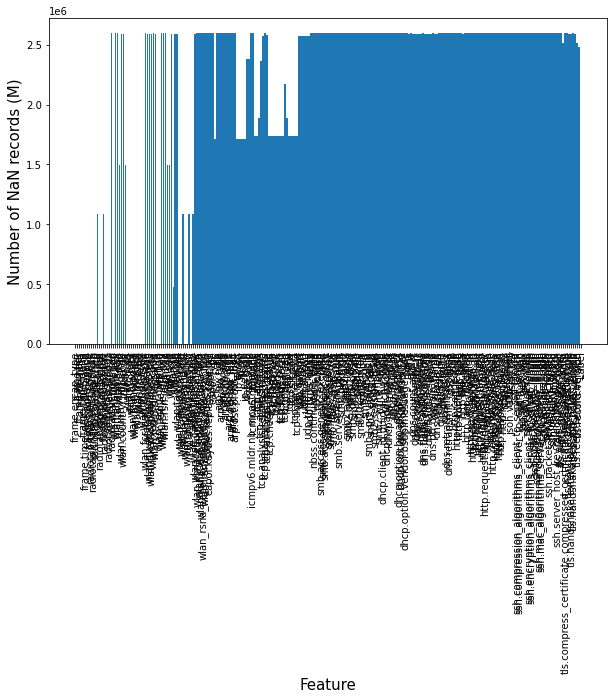

In [45]:
plt.figure(figsize=(10,6))
# bar plot with matplotlib
plt.bar(nan_values.index,nan_values.values)
plt.xlabel("Feature", size=15)
plt.xticks(rotation = 90)
plt.ylabel("Number of NaN records (M)", size=15)
#plt.title("Number of Movies by genre", size=18)
plt.show()

In [39]:
nan_values.index

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time',
       'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm',
       ...
       'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.connection_id', 'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=254)

In [41]:
nan_values.values

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0, 1084506,       0,       0,
       1084826,       0,       0,       0, 2598356,       0, 2598346,
       2598346, 1498059, 2592457, 2592457, 1498745,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
       2598356, 2592457, 2592431, 2592431, 2598352, 2592457,       0,
             0, 2598346, 2598347, 2598345, 1497896, 1497869, 2592387,
        477317, 2592137, 2592137,       0,       0, 1084826,       0,
             0, 1084826,       0, 1084826, 2592423, 2598312, 2598323,
       2598312, 2598312, 2598312, 2598312, 2598312, 2598105, 2598105,
       1710195, 2597852, 2597852, 2597852, 2597852, 2597852, 2597852,
       2597852, 2597852, 2597852, 2597852, 1712917, 1712917, 1712917,
       1712917, 1711655, 2377604, 2377978, 2598269, 2598356, 1737552,
       1737552, 1887456, 2365608, 2576967, 2598356, 2577957, 1737552,
       1737552, 1737

In [46]:
rootpath="AWID3_Dataset_CSV/CSV/13.Website_spoofing/"
listfiles_webSpoofing = [f for f in listdir(rootpath) if isfile(join(rootpath, f))]
listfiles_webSpoofing=natsorted(listfiles_webSpoofing)

In [47]:
listfiles_webSpoofing

['Website_spoofing_0.csv',
 'Website_spoofing_1.csv',
 'Website_spoofing_2.csv',
 'Website_spoofing_3.csv',
 'Website_spoofing_4.csv',
 'Website_spoofing_5.csv',
 'Website_spoofing_6.csv',
 'Website_spoofing_7.csv',
 'Website_spoofing_8.csv',
 'Website_spoofing_9.csv',
 'Website_spoofing_10.csv',
 'Website_spoofing_11.csv',
 'Website_spoofing_12.csv',
 'Website_spoofing_13.csv',
 'Website_spoofing_14.csv',
 'Website_spoofing_15.csv',
 'Website_spoofing_16.csv',
 'Website_spoofing_17.csv',
 'Website_spoofing_18.csv',
 'Website_spoofing_19.csv',
 'Website_spoofing_20.csv',
 'Website_spoofing_21.csv',
 'Website_spoofing_22.csv',
 'Website_spoofing_23.csv',
 'Website_spoofing_24.csv',
 'Website_spoofing_25.csv',
 'Website_spoofing_26.csv',
 'Website_spoofing_27.csv',
 'Website_spoofing_28.csv',
 'Website_spoofing_29.csv',
 'Website_spoofing_30.csv',
 'Website_spoofing_31.csv',
 'Website_spoofing_32.csv',
 'Website_spoofing_33.csv',
 'Website_spoofing_34.csv',
 'Website_spoofing_35.csv',
 '

In [48]:
df2 = pd.DataFrame()
for file in listfiles_webSpoofing:
    df_temp = pd.read_csv (rootpath+file, low_memory=False)
    df2=pd.concat([df2,df_temp])
    print(df2.shape)


(50000, 254)
(99999, 254)
(149999, 254)
(199999, 254)
(249997, 254)
(299997, 254)
(349997, 254)
(399997, 254)
(449997, 254)
(499997, 254)
(549995, 254)
(599995, 254)
(649995, 254)
(699995, 254)
(749995, 254)
(799995, 254)
(849995, 254)
(899994, 254)
(949994, 254)
(999994, 254)
(1049993, 254)
(1099993, 254)
(1149993, 254)
(1199991, 254)
(1249989, 254)
(1299989, 254)
(1349989, 254)
(1399988, 254)
(1449988, 254)
(1499988, 254)
(1549988, 254)
(1599988, 254)
(1649988, 254)
(1699988, 254)
(1749988, 254)
(1799988, 254)
(1849988, 254)
(1899988, 254)
(1949988, 254)
(1999986, 254)
(2049986, 254)
(2099986, 254)
(2149986, 254)
(2199986, 254)
(2249986, 254)
(2299986, 254)
(2349986, 254)
(2399986, 254)
(2449986, 254)
(2499986, 254)
(2549984, 254)
(2599984, 254)
(2649984, 254)
(2668567, 254)


In [49]:
nan_values2=df2.isna().sum()

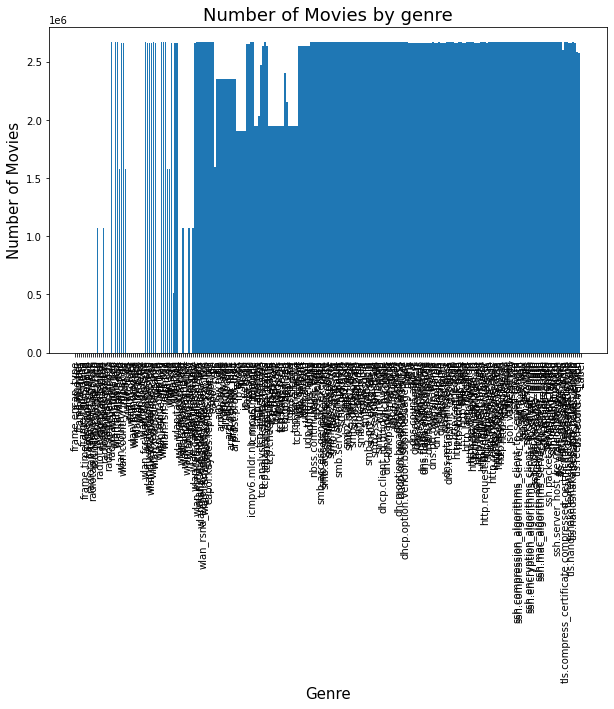

In [50]:
plt.figure(figsize=(10,6))
# bar plot with matplotlib
plt.bar(nan_values2.index,nan_values2.values)
plt.xlabel("Genre", size=15)
plt.xticks(rotation = 90)
plt.ylabel("Number of Movies", size=15)
plt.title("Number of Movies by genre", size=18)
plt.show()

In [52]:
#df = df.replace('?', np.NaN)
zvar_atts = []
nm_nzvar_atts = []
m_nzvar_atts = []


In [64]:
df['frame.len']

0        342
1        342
2        342
3        342
4        342
        ... 
48360     76
48361     70
48362    158
48363     88
48364     79
Name: frame.len, Length: 2598356, dtype: int64

In [66]:

#for i in range(df.shape[1]):
for i in df:
    if len(df[i].unique()) == 1:
        zvar_atts.append(i)
    elif df[i].isnull().sum() == 0:
        nm_nzvar_atts.append(i)
    elif len(df[i].unique()) > 2 and df[i].isnull().sum() > 0:
        missing_frac = df[i].isnull().sum()/df.shape[0]*100
        if missing_frac < 50.0:
            m_nzvar_atts.append(i) 


In [72]:
print(len(nm_nzvar_atts))

27


In [71]:
print(len(m_nzvar_atts))

6


In [70]:
zvar_atts
print(len(zvar_atts))

41


In [73]:

zvar_atts.sort()
nm_nzvar_atts.sort()
m_nzvar_atts.sort()
        



In [79]:
nzvar_atts = list(set(nm_nzvar_atts+m_nzvar_atts))
print(len(nzvar_atts))
nzvar_atts

33


['frame.time_epoch',
 'wlan.fc.subtype',
 'wlan.fc.moredata',
 'frame.len',
 'wlan_radio.end_tsf',
 'wlan_radio.start_tsf',
 'wlan.fc.protected',
 'radiotap.dbm_antsignal',
 'wlan.fc.ds',
 'radiotap.length',
 'wlan.fc.frag',
 'wlan_radio.data_rate',
 'frame.time',
 'wlan.ta',
 'wlan.ra',
 'radiotap.mactime',
 'Label',
 'wlan_radio.timestamp',
 'wlan_radio.duration',
 'radiotap.datarate',
 'wlan_radio.signal_dbm',
 'radiotap.timestamp.ts',
 'frame.time_delta',
 'wlan.fc.pwrmgt',
 'wlan_radio.phy',
 'wlan.fc.retry',
 'wlan.fc.type',
 'frame.number',
 'radiotap.present.tsft',
 'frame.time_delta_displayed',
 'wlan.fc.order',
 'wlan.duration',
 'frame.time_relative']

In [80]:
nzvar_atts.sort()
nzvar_atts


['Label',
 'frame.len',
 'frame.number',
 'frame.time',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_epoch',
 'frame.time_relative',
 'radiotap.datarate',
 'radiotap.dbm_antsignal',
 'radiotap.length',
 'radiotap.mactime',
 'radiotap.present.tsft',
 'radiotap.timestamp.ts',
 'wlan.duration',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.moredata',
 'wlan.fc.order',
 'wlan.fc.protected',
 'wlan.fc.pwrmgt',
 'wlan.fc.retry',
 'wlan.fc.subtype',
 'wlan.fc.type',
 'wlan.ra',
 'wlan.ta',
 'wlan_radio.data_rate',
 'wlan_radio.duration',
 'wlan_radio.end_tsf',
 'wlan_radio.phy',
 'wlan_radio.signal_dbm',
 'wlan_radio.start_tsf',
 'wlan_radio.timestamp']

In [90]:
df_red = df[nzvar_atts]

SyntaxError: invalid syntax (1663519967.py, line 1)

In [ ]:
df_red

In [ ]:
dfTrn_red.to_csv('./datasets/Trn_NZVAR_37.csv',index = False, header = False)
          
srcTst = 'datasets/AWID-CLS-R-Tst.csv'
dfTst = pd.read_csv(srcTst, header=None, low_memory= False)
dfTst = dfTst.replace('?', np.NaN)

dfTst_red = dfTst[nzvar_atts]
dfTst_red.to_csv('./datasets/Tst_NZVAR_37.csv',index = False, header = False)
